In [138]:
import numpy as np
from numpy.random import default_rng
import math
from math import ceil, log
from numpy import e
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from sklearn import preprocessing

In [241]:
# NOTES
# Obj func = |psi1|^2 + |psi2|^2 + |phi1|^2 + |phi2|^2
# normalized Obj func = |psi1|^2 + |psi2|^2 + |phi1|^2 + |phi2|^2 / |psi1(0)|^2 + |psi2(0)|^2 + |phi1(0)|^2 + |phi2(0)|^2

# NORMALIZED OBJ FUNC = 0.9954247313678455
# t = 0
# c1 = -8.042455772869037
# c2 = 0.4104156269769683
# c3 = 0.7626971134550099
# c4 = 0.12854464458518508
# epsilon = 0.7365235537491663
# delta = 0.5104429911912247
# chi = -0.8622287451860423
# normalized prep: [e = 0.1736529471982681, g = 0.8263470528017319]

# Solution values (obj func = 0.7670691278323817)
# t = 9.99997769055193
# c1 = -8.042455772869037
# c2 = 0.4104156269769683
# c3 = 0.7626971134550099
# c4 = 0.12854464458518508
# epsilon = 0.775287951314912
# delta = 0.5104429911912247
# chi = -0.8494864484591551

#Solution values #2 (obj func = 0.9999934039340339)
# t = 9.99997769055193
# c1 = -7.6403329842255845
# c2 = 0.4042593925723138
# c3 = 0.7626971134550099
# c4 = 0.12854464458518508
# epsilon = 0.775287951314912
# delta = 0.5104429911912247
# chi = -0.8494864484591551

# Initial Psi and Phi values (for 0.7 obj function)
# normalized psi squared: 0.1593870285838253
# normalized phi squared: 0.8406129714161747

# Initial Psi and Phi values (for 0.99999 obj function)
# normalized psi squared: 0.15964416446207588
# normalized phi squared: 0.840355835537924

In [204]:
def psi1(t, c1, c2, c3, c4, epsilon, delta, chi):
    return c1*epsilon*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c2*epsilon*t*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c2*squareroot(epsilon, delta, chi)*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c3*epsilon*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*epsilon*t*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*(delta**2 + 2*delta*chi + epsilon**2)*e**(t*squareroot(epsilon, delta, chi)/2) \
    /((delta + 2*chi)*squareroot(epsilon, delta, chi))
    
def psi2(t, c1, c2, c3, c4, epsilon, delta, chi):
    return -c1*squareroot(epsilon, delta, chi)*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c2*epsilon*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) - \
    c2*t*squareroot(epsilon, delta, chi)*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c3*squareroot(epsilon, delta, chi)*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*epsilon*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*t*squareroot(epsilon, delta, chi)*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi)
    
def phi1(t, c1, c2, c3, c4, epsilon, delta, chi):
    return c1*e**(-t*squareroot(epsilon, delta, chi)/2) + \
    c2*t*e**(-t*squareroot(epsilon, delta, chi)/2) + \
    c3*e**(t*squareroot(epsilon, delta, chi)/2) + \
    c4*t*e**(t*squareroot(epsilon, delta, chi)/2)

def phi2(t, c2, c4, epsilon, delta, chi):
    return c2*e**(-t*squareroot(epsilon, delta, chi)/2) + \
    c4*e**(t*squareroot(epsilon, delta, chi)/2)

def check_sqrt(epsilon, delta, chi):
    return -delta**2 - 2*delta*chi - epsilon**2 < 0

def squareroot(epsilon, delta, chi):
    result = -delta**2 - 2*delta*chi - epsilon**2
    return math.sqrt(result)

def func(xp):
    return ((abs(psi1(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2 + \
            (abs(psi2(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2 + \
            (abs(phi1(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2 + \
            (abs(phi2(xp[0], xp[2], xp[4], xp[5], xp[6], xp[7])))**2)

In [155]:
def normalize_func(xp):
    psi_squared = (abs(psi1(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2 + \
            (abs(psi2(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2
    phi_squared = (abs(phi1(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2 + \
            (abs(phi2(xp[0], xp[2], xp[4], xp[5], xp[6], xp[7])))**2
    return [psi_squared**2/(psi_squared**2+phi_squared**2), phi_squared**2/(psi_squared**2+phi_squared**2)]

In [156]:
normalize_func([0, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551])

[0.1593870285838253, 0.8406129714161747]

In [240]:
normalize_func([0, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.7365235537491663, 0.5104429911912247, -0.8622287451860423])

[0.1736529471982681, 0.8263470528017319]

In [157]:
normalize_func([0, -7.6403329842255845, 0.4042593925723138, 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551])

[0.15964416446207588, 0.840355835537924]

In [158]:
func([9.99997769055193, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551])

0.7670691278323817

In [159]:
func([9.99997769055193, -7.6403329842255845, 0.4042593925723138, 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551])

0.9999934039340339

In [175]:
func([0, -7.6403329842255845, 0.4042593925723138, 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551])

68.3263823090241

In [220]:
# [t, c1p, c2p, c3p, c4p, epsilonp, deltap, chip]
x0=[9.99997769055193, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.7365235537491663, 0.5104429911912247, -0.8622287451860423]
#[9.99997769055193, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551]
#[9.999999, -8, 0.4, 0.8, 0.1, 0.7, 1.01, -0.8]

dimension = 8

#intervals = [0.0000001, 0.05, 0.05, 0.05, 0.05, 0.2, 0.0001, 0.02]
num_points = 20 # points for each param
num_combos = 28

#  t,c1 ;  t,c2 ;  t,c3 ;  t,c4 ;  t, d ; t, e ;  t, x (7) - t
# c1,c2 ; c1,c3 ; c1,c4 ; c1, e ; c1, d ; c1, x        (6) - c1
# c2,c3 ; c2,c4 ; c2, e ; c2, d ; c2, x                (5) - c2
# c3,c4 ; c3, e ; c3, d ; c3, x                        (4) - c3
# c4, e ; c4, d ; c4, x                                (3) - c4
#  e, d ;  e, x                                        (2) - e
#  d, x                                                (1) - d

#Initialize param array
param_data = [] #7 by 20
for d in range(dimension): #arrays for t-x
    param_data.append([0] * num_points)

#Initialize z array
func_vals = [] #28 by 400
for c in range(num_combos):
    func_vals.append([0] * (num_points**2))

#Fill param arrays
for d in range(dimension):
    for i in range(num_points):#0 to 20
        param_data[d][i] = x0[d]*(1+(-0.05+0.005*i))
    
xp_list = [] #what is passed into func
combo_count = 0
#Fill z arrays
for x in range(dimension-1): #x from c1-x [0, 6]
    #print("x", x)
    for y in range(7-x):
        real_y = x+y+1
        #print("\ty", real_y)
        #print("\tcc", combo_count)
        z_count = 0
        for i in range(num_points):
            for j in range(num_points):
                xp_list = [9.99997769055193, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.7365235537491663, 0.5104429911912247, -0.8622287451860423]
                #[9.99997769055193, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551] #reset to original vals
                #print("\t\tlist",xp_list)
                xp_list[x] = param_data[x][i] #replace x param
                xp_list[real_y] = param_data[real_y][j] #replace y param
                #print("\t\tlist",xp_list)
                if check_sqrt(xp_list[5], xp_list[6], xp_list[7]):
                    func_vals[combo_count][z_count] = 0;
                else:
                    func_vals[combo_count][z_count] = func(xp_list)
                    xp_list_init = xp_list
                    xp_list_init[0] = 0
                    func_vals[combo_count][z_count] = func_vals[combo_count][z_count]/func(xp_list_init)
                z_count = z_count+1
        combo_count = combo_count+1
          

#print(combo_count)
#print(func_vals)

In [221]:
figs = []
for i in range(7):
    figs.append(plt.Figure(figsize=plt.figaspect(1/(7-i))))

# data stores [t, c1p, c2p, c3p, c4p, epsilonp, deltap, chip, obj]

#  t,c1 ;  t,c2 ;  t,c3 ;  t,c4 ;  t, d ; t, e ;  t, x (7) - t
# c1,c2 ; c1,c3 ; c1,c4 ; c1, e ; c1, d ; c1, x        (6) - c1
# c2,c3 ; c2,c4 ; c2, e ; c2, d ; c2, x                (5) - c2
# c3,c4 ; c3, e ; c3, d ; c3, x                        (4) - c3
# c4, e ; c4, d ; c4, x                                (3) - c4
#  e, d ;  e, x                                        (2) - e
#  d, x                                                (1) - d
combination_index=0
params = ["t", "C1", "C2", "C3", "C4", "Epsilon", "Delta", "Chi"]

for overall in range(7):
    num_axs = 7 - overall
    for plot_count in range(num_axs):
        ax = figs[overall].add_subplot(1, num_axs, plot_count+1, projection='3d')
        #ax.scatter3D(data[overall], data[overall+plot_count+1], data[-1])
        
        #prep data
        #x_vals, x_idx = np.unique(data[overall], return_inverse=True)
        #y_vals, y_idx = np.unique(data[overall+plot_count+1], return_inverse=True)
        X, Y = np.meshgrid(np.array(param_data[overall]), np.array(param_data[overall+plot_count+1]))
        zs = np.array(func_vals[combination_index])
        Z = zs.reshape(X.shape)

        ax.plot_surface(X, Y, Z)

        ax.set_xlabel(params[overall])
        ax.set_ylabel(params[overall+plot_count+1])
        #ax.set_zlabel('Objective Function value')
        #print(z_array)
        # print(y)
#        ax.plot_surface(x, y, z_array, cmap=cm.coolwarm, linewidth=0, antialiased=False)
        ax.set_title(params[overall] + ' and ' + params[overall+plot_count+1])
        #ax.set(xlabel=str(overall), ylabel=str(overall+plot_count+1))
        combination_index = combination_index + 1

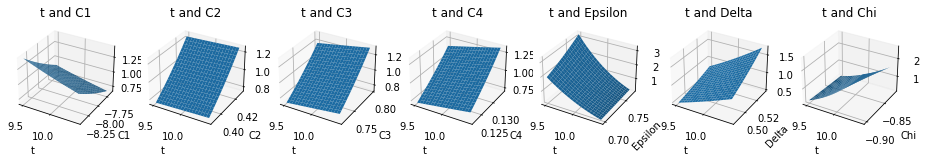

In [222]:
figs[0]

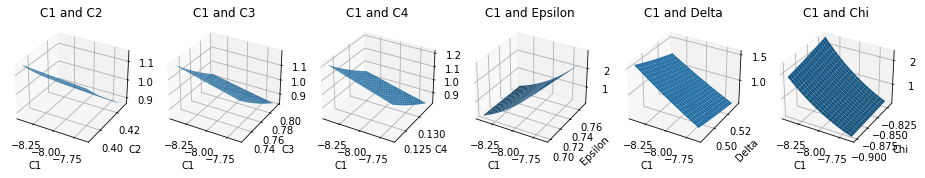

In [223]:
figs[1]

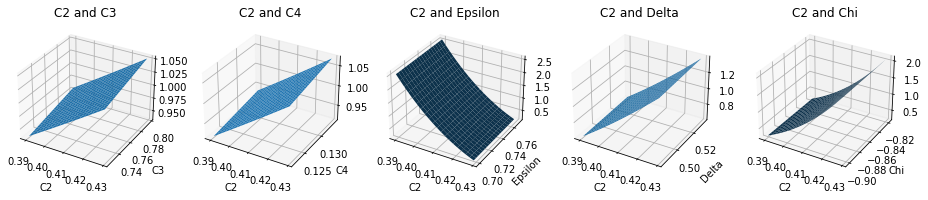

In [224]:
figs[2]

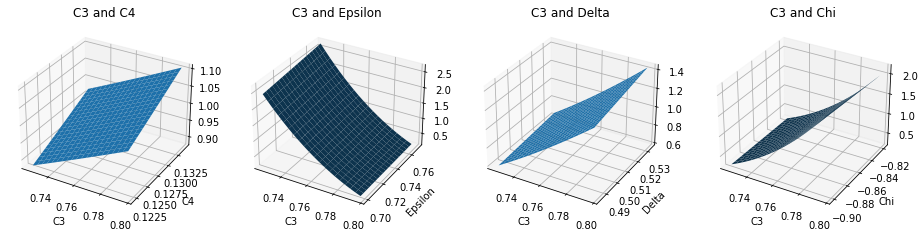

In [225]:
figs[3]

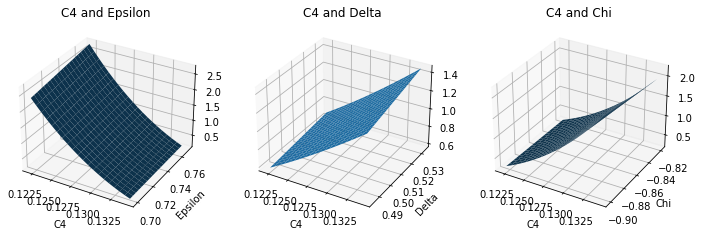

In [226]:
figs[4]

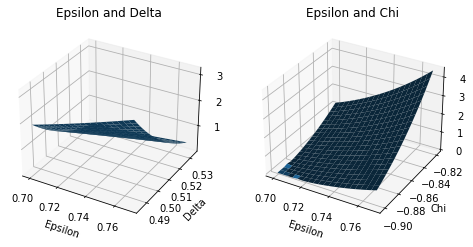

In [227]:
figs[5]

In [210]:
func_vals[26][13] #combo 26 = epsilon, chi

0.9954247313678455

In [214]:
func_vals[26]

[0.11531649493069268,
 0.158696623138103,
 0.20632056825081163,
 0.25795105488423614,
 0.31348136225686063,
 0.37288283347231116,
 0.4361770140031453,
 0.5034197509488544,
 0.5746915985416532,
 0.65009176972849,
 0.7297341881250601,
 0.813744838628242,
 0.9022599505672015,
 0.9954247313678455,
 1.0933924741750218,
 1.1963239255951101,
 1.3043868382442783,
 1.4177556571285839,
 1.536611304653986,
 1.6611410395137232,
 0.06526701387345028,
 0.10222222001146664,
 0.14414073828044657,
 0.19042602747781787,
 0.2407800500337894,
 0.2950616217773987,
 0.35322084808446386,
 0.4152652842198768,
 0.4812410252785731,
 0.5512214807079299,
 0.62530038842002,
 0.7035873013976147,
 0.7862045834362175,
 0.8732853618354041,
 0.9649721069435613,
 1.0614156340349559,
 1.1627743968310391,
 1.269213986880526,
 1.3809067811410576,
 1.4980316981900104,
 0.026134284768262534,
 0.05429954367311998,
 0.08938555792406457,
 0.12974783723284006,
 0.17463274472680182,
 0.2236659772272598,
 0.2766644570632173,
 0.33

In [211]:
param_data[5][0]

0.7365235537491663

In [217]:
param_data[7][13]

-0.8622287451860423

In [219]:
func([9.99997769055193, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.7365235537491663, 0.5104429911912247, -0.8622287451860423])/func([0, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.7365235537491663, 0.5104429911912247, -0.8622287451860423])

0.9954247313678455

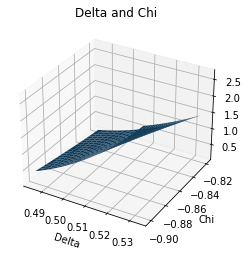

In [228]:
figs[6]

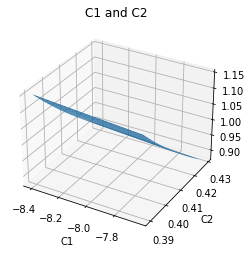

In [229]:
fig_c12 = plt.Figure()#figsize=plt.figaspect(1/(7-i)))
ax_c12 = fig_c12.add_subplot(111, projection='3d')
#ax.scatter3D(data[overall], data[overall+plot_count+1], data[-1])

#prep data
#x_vals, x_idx = np.unique(data[overall], return_inverse=True)
#y_vals, y_idx = np.unique(data[overall+plot_count+1], return_inverse=True)
X_c12, Y_c12 = np.meshgrid(np.array(param_data[1]), np.array(param_data[2]))
zs_c12 = np.array(func_vals[7]) #combo 7 = c1, c2
Z_c12 = zs_c12.reshape(X_c12.shape)

ax_c12.plot_surface(X_c12, Y_c12, Z_c12)

ax_c12.set_xlabel(params[1])
ax_c12.set_ylabel(params[2])
ax_c12.set_title(params[1] + ' and ' + params[2])


#print(z_array)
# print(y)
#        ax.plot_surface(x, y, z_array, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.set(xlabel=str(overall), ylabel=str(overall+plot_count+1))
fig_c12

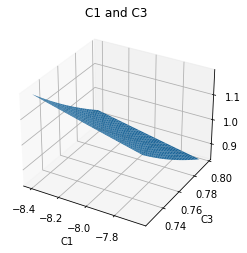

In [230]:
fig_c13 = plt.Figure()#figsize=plt.figaspect(1/(7-i)))
ax_c13 = fig_c13.add_subplot(111, projection='3d')
#ax.scatter3D(data[overall], data[overall+plot_count+1], data[-1])

#prep data
#x_vals, x_idx = np.unique(data[overall], return_inverse=True)
#y_vals, y_idx = np.unique(data[overall+plot_count+1], return_inverse=True)
X_c13, Y_c13 = np.meshgrid(np.array(param_data[1]), np.array(param_data[3]))
zs_c13 = np.array(func_vals[8]) #combo 8 = c1, c3
Z_c13 = zs_c13.reshape(X_c13.shape)

ax_c13.plot_surface(X_c13, Y_c13, Z_c13)

ax_c13.set_xlabel(params[1])
ax_c13.set_ylabel(params[3])
ax_c13.set_title(params[1] + ' and ' + params[3])


#print(z_array)
# print(y)
#        ax.plot_surface(x, y, z_array, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.set(xlabel=str(overall), ylabel=str(overall+plot_count+1))
fig_c13

In [233]:
# print("c1 = ", param_data[1][0])
# print("c2 = ", param_data[2][7])
# func([9.99997769055193, -7.6403329842255845, 0.4042593925723138, 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551])

In [234]:
# func_vals[7][7]

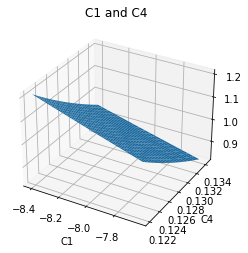

In [231]:
fig_c14 = plt.Figure()#figsize=plt.figaspect(1/(7-i)))
ax_c14 = fig_c14.add_subplot(111, projection='3d')
#ax.scatter3D(data[overall], data[overall+plot_count+1], data[-1])

#prep data
#x_vals, x_idx = np.unique(data[overall], return_inverse=True)
#y_vals, y_idx = np.unique(data[overall+plot_count+1], return_inverse=True)
X_c14, Y_c14 = np.meshgrid(np.array(param_data[1]), np.array(param_data[4]))
zs_c14 = np.array(func_vals[9]) #combo 9 = c1, c4
Z_c14 = zs_c14.reshape(X_c14.shape)

ax_c14.plot_surface(X_c14, Y_c14, Z_c14)

ax_c14.set_xlabel(params[1])
ax_c14.set_ylabel(params[4])
ax_c14.set_title(params[1] + ' and ' + params[4])


#print(z_array)
# print(y)
#        ax.plot_surface(x, y, z_array, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.set(xlabel=str(overall), ylabel=str(overall+plot_count+1))
fig_c14

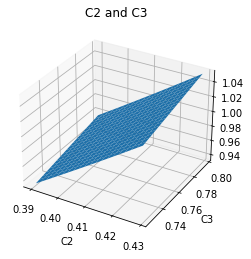

In [232]:
fig_c23 = plt.Figure()#figsize=plt.figaspect(1/(7-i)))
ax_c23 = fig_c23.add_subplot(111, projection='3d')
#ax.scatter3D(data[overall], data[overall+plot_count+1], data[-1])

#prep data
#x_vals, x_idx = np.unique(data[overall], return_inverse=True)
#y_vals, y_idx = np.unique(data[overall+plot_count+1], return_inverse=True)
X_c23, Y_c23 = np.meshgrid(np.array(param_data[2]), np.array(param_data[3]))
zs_c23 = np.array(func_vals[13]) #combo 13 = c2, c3
Z_c23 = zs_c23.reshape(X_c23.shape)

ax_c23.plot_surface(X_c23, Y_c23, Z_c23)

ax_c23.set_xlabel(params[2])
ax_c23.set_ylabel(params[3])
ax_c23.set_title(params[2] + ' and ' + params[3])


#print(z_array)
# print(y)
#        ax.plot_surface(x, y, z_array, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.set(xlabel=str(overall), ylabel=str(overall+plot_count+1))
fig_c23

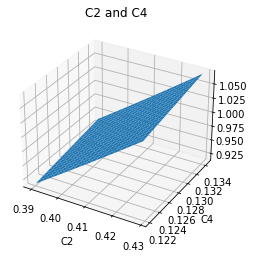

In [236]:
fig_c24 = plt.Figure()#figsize=plt.figaspect(1/(7-i)))
ax_c24 = fig_c24.add_subplot(111, projection='3d')
#ax.scatter3D(data[overall], data[overall+plot_count+1], data[-1])

#prep data
#x_vals, x_idx = np.unique(data[overall], return_inverse=True)
#y_vals, y_idx = np.unique(data[overall+plot_count+1], return_inverse=True)
X_c24, Y_c24 = np.meshgrid(np.array(param_data[2]), np.array(param_data[4]))
zs_c24 = np.array(func_vals[14]) #combo 14 = c2, c4
Z_c24 = zs_c24.reshape(X_c24.shape)

ax_c24.plot_surface(X_c24, Y_c24, Z_c24)

ax_c24.set_xlabel(params[2])
ax_c24.set_ylabel(params[4])
ax_c24.set_title(params[2] + ' and ' + params[4])


#print(z_array)
# print(y)
#        ax.plot_surface(x, y, z_array, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.set(xlabel=str(overall), ylabel=str(overall+plot_count+1))
fig_c24

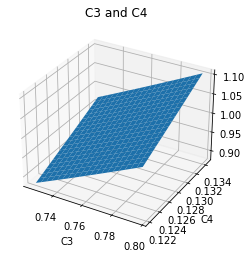

In [238]:
fig_c34 = plt.Figure()#figsize=plt.figaspect(1/(7-i)))
ax_c34 = fig_c34.add_subplot(111, projection='3d')
#ax.scatter3D(data[overall], data[overall+plot_count+1], data[-1])

#prep data
#x_vals, x_idx = np.unique(data[overall], return_inverse=True)
#y_vals, y_idx = np.unique(data[overall+plot_count+1], return_inverse=True)
X_c34, Y_c34 = np.meshgrid(np.array(param_data[3]), np.array(param_data[4]))
zs_c34 = np.array(func_vals[18]) #combo 18 = c3, c4
Z_c34 = zs_c34.reshape(X_c34.shape)

ax_c34.plot_surface(X_c34, Y_c34, Z_c34)

ax_c34.set_xlabel(params[3])
ax_c34.set_ylabel(params[4])
ax_c34.set_title(params[3] + ' and ' + params[4])


#print(z_array)
# print(y)
#        ax.plot_surface(x, y, z_array, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.set(xlabel=str(overall), ylabel=str(overall+plot_count+1))
fig_c34